In [1]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 20

import warnings
warnings.filterwarnings('ignore')

In [4]:
from vega_datasets import data
df = data.sf_temps()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [7]:
df.head(10) #df already in dt format

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
5,45.8,2010-01-01 05:00:00
6,45.9,2010-01-01 06:00:00
7,45.9,2010-01-01 07:00:00
8,46.4,2010-01-01 08:00:00
9,48.0,2010-01-01 09:00:00


In [8]:
df = df.set_index('date').sort_index() #set date as index

In [10]:
df['weekday_name'] = df.index.day_name()

In [11]:
df.head()

,temp,weekday_name
date,,
2010-01-01 00:00:00,47.8,Friday
2010-01-01 01:00:00,47.4,Friday
2010-01-01 02:00:00,46.9,Friday
2010-01-01 03:00:00,46.5,Friday
2010-01-01 04:00:00,46.0,Friday


In [12]:
df.groupby('weekday_name').mean()

,temp
weekday_name,
Friday,56.795912
Monday,56.952724
Saturday,56.945913
Sunday,56.955172
Thursday,56.937981
Tuesday,56.945753
Wednesday,56.937821


In [18]:
daily_df = df.resample('D').mean()
daily_df #resamping by day with daily mean over the year period of data in the df

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


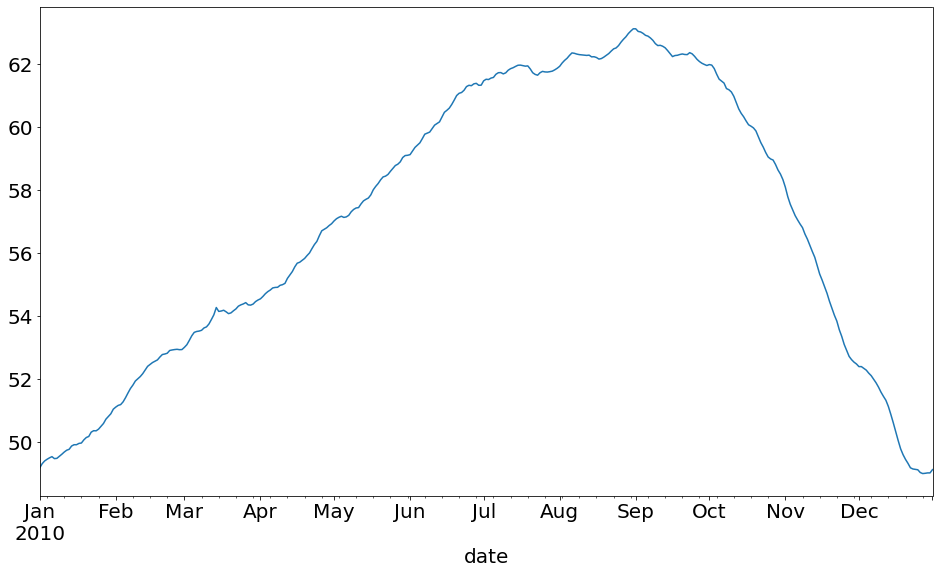

In [19]:
daily_df.temp.plot(label='Daily')
plt.show()